Name - Chelsea Rodrigues 

Student number - 23200333

Course name - Masters in Data and Computational Science 

Project name - Tuberculosis(TB) chest X-ray classification using Dense Net and Deep forest

In [18]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
from deepforest import CascadeForestClassifier as GCForest
from cv2 import resize, imread
from sklearn.model_selection import train_test_split
# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
base_dir = "./TB_Chest_Radiography_Database"
os.listdir(base_dir)

['.DS_Store',
 'Tuberculosis',
 'Normal.metadata.xlsx',
 'Tuberculosis.metadata.xlsx',
 'Normal',
 'README.md.txt']

In [3]:
tuberculosis_data = base_dir + "/Tuberculosis"
normal_data =  base_dir + "/Normal"

In [4]:
print(("no. of tuberculosis images :", len(os.listdir(tuberculosis_data))))
print(("no. of normal images :", len(os.listdir(normal_data))))

('no. of tuberculosis images :', 700)
('no. of normal images :', 701)


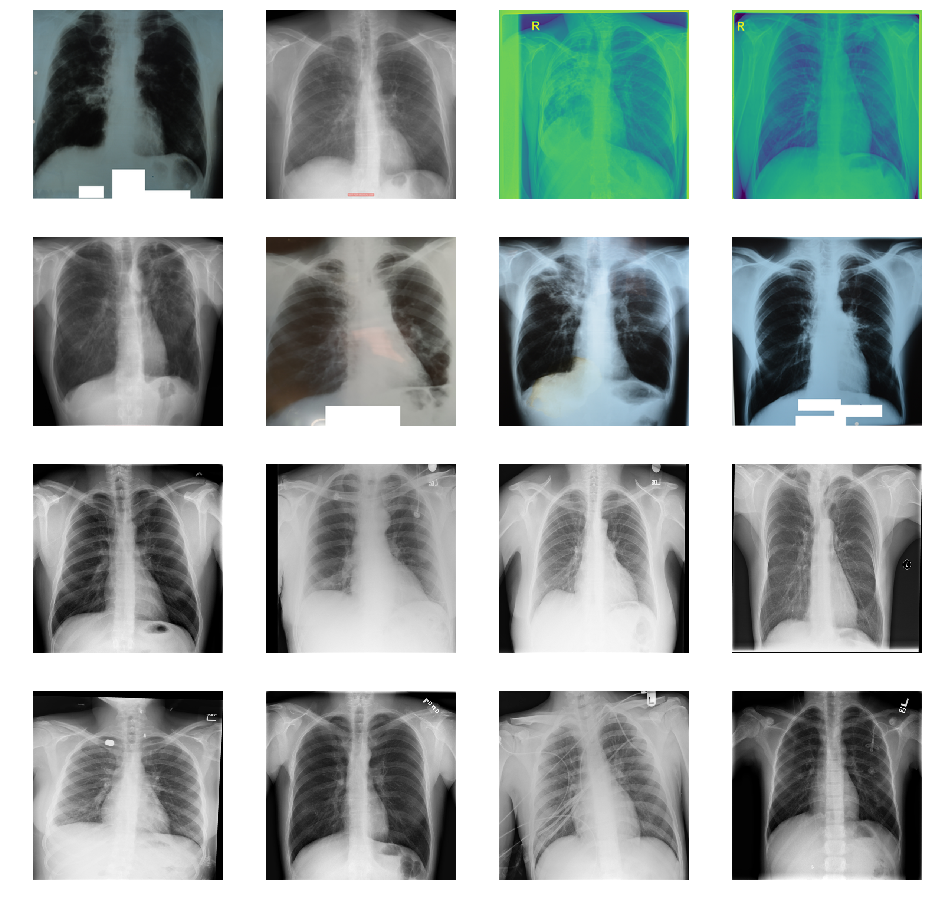

In [5]:
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8

tuberculosis_img = [
    os.path.join(tuberculosis_data, image)
    for image in os.listdir(tuberculosis_data)[pic_index - 8:pic_index]
]
normal_img = [
    os.path.join(normal_data, image)
    for image in os.listdir(normal_data)[pic_index - 8:pic_index]
]

for i, image_path in enumerate(tuberculosis_img + normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [12]:
data = []
target = []
Categories = ["Normal","Tuberculosis"]

for i in Categories:
    print(f"loading categories : {i}")
    path = os.path.join(base_dir,i)
    for img in os.listdir(path):
        if img != ".DS_Store":
            img_array = imread(os.path.join(path,img))
            img_resized = resize(img_array,(150,150))
            data.append(img_resized.flatten())
            target.append(Categories.index(i))
    print(f"loaded category {i} ")

loading categories : Normal
loaded category Normal 
loading categories : Tuberculosis
loaded category Tuberculosis 


In [13]:
data = np.array(data)
target = np.array(target)

In [14]:
df = pd.DataFrame(data)
df["Target"] = target

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,34,34,34,12,12,12,5,5,5,6,6,6,6,6,6,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,6,...,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,81,81,81,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,39,39,10,10,10,7,7,7,7,7,7,7,...,228,228,228,227,227,227,226,226,226,223,223,223,225,225,225,220,220,220,219,219,219,217,217,217,214,214,214,212,212,212,204,204,204,192,192,192,183,183,183,0
2,16,16,16,16,16,16,15,15,15,16,16,16,16,16,16,15,15,15,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,...,42,42,42,8,8,8,6,6,6,8,8,8,9,9,9,9,9,9,10,10,10,14,14,14,32,32,32,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,79,79,79,117,117,117,147,147,147,144,144,144,137,137,137,137,137,137,136,136,136,139,139,139,143,143,143,147,147,147,149,149,149,152,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,3,3,3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,93,93,83,83,83,62,62,62,36,36,36,20,20,20,7,7,7,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
X = df.drop('Target',axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,34,34,34,12,12,12,5,5,5,6,6,6,6,6,6,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,81,81,81
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,39,39,10,10,10,7,7,7,7,7,7,7,...,230,228,228,228,227,227,227,226,226,226,223,223,223,225,225,225,220,220,220,219,219,219,217,217,217,214,214,214,212,212,212,204,204,204,192,192,192,183,183,183
2,16,16,16,16,16,16,15,15,15,16,16,16,16,16,16,15,15,15,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,...,128,42,42,42,8,8,8,6,6,6,8,8,8,9,9,9,9,9,9,10,10,10,14,14,14,32,32,32,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,79,79,79,117,117,117,147,147,147,144,144,144,137,137,137,137,137,137,136,136,136,139,139,139,143,143,143,147,147,147,149,149,149,152,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,3,3,3,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96,93,93,93,83,83,83,62,62,62,36,36,36,20,20,20,7,7,7,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
Y = df[['Target']]
Y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,Y)

In [30]:
gcForest = GCForest()
gcForest.fit(X_train.values,y_train.values.flatten())

[2022-02-12 06:07:09.061] Start to fit the model:
[2022-02-12 06:07:09.061] Fitting cascade layer = 0 
[2022-02-12 06:11:45.279] layer = 0  | Val Acc = 95.905 % | Elapsed = 276.219 s
[2022-02-12 06:11:45.973] Fitting cascade layer = 1 
[2022-02-12 06:12:25.717] layer = 1  | Val Acc = 96.000 % | Elapsed = 39.732 s
[2022-02-12 06:12:25.723] Fitting cascade layer = 2 
[2022-02-12 06:13:05.482] layer = 2  | Val Acc = 96.381 % | Elapsed = 39.759 s
[2022-02-12 06:13:05.494] Fitting cascade layer = 3 
[2022-02-12 06:14:08.340] layer = 3  | Val Acc = 95.524 % | Elapsed = 62.846 s
[2022-02-12 06:14:08.341] Early stopping counter: 1 out of 2
[2022-02-12 06:14:08.355] Fitting cascade layer = 4 
[2022-02-12 06:15:07.453] layer = 4  | Val Acc = 95.619 % | Elapsed = 59.098 s
[2022-02-12 06:15:07.454] Early stopping counter: 2 out of 2
[2022-02-12 06:15:07.454] Handling early stopping
[2022-02-12 06:15:07.456] The optimal number of layers: 3


In [31]:
print(f" Cascaded Forest ACCURACY {gcForest.score(X_test.values,y_test.values.flatten())}")

[2022-02-12 06:15:19.113] Start to evalute the model:
[2022-02-12 06:15:22.049] Evaluating cascade layer = 0 
[2022-02-12 06:15:22.180] Evaluating cascade layer = 1 
[2022-02-12 06:15:22.269] Evaluating cascade layer = 2 
 Cascaded Forest ACCURACY 0.9657142857142857


[2022-02-12 06:27:13.044] Start to evalute the model:
[2022-02-12 06:27:14.675] Evaluating cascade layer = 0 
[2022-02-12 06:27:14.746] Evaluating cascade layer = 1 
[2022-02-12 06:27:14.816] Evaluating cascade layer = 2 


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0cb9c0f28>)

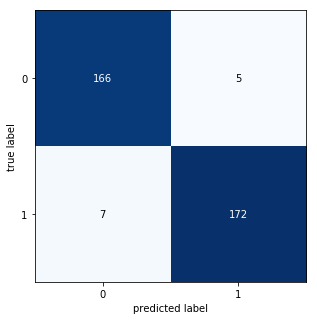

In [32]:
cm = confusion_matrix(y_test.values.flatten(), gcForest.predict(X_test.values))
plot_confusion_matrix(cm, figsize=(5,5))

In [34]:
print((accuracy_score(y_test.values.flatten(), gcForest.predict(X_test.values))))

[2022-02-12 06:27:48.231] Start to evalute the model:
[2022-02-12 06:27:49.758] Evaluating cascade layer = 0 
[2022-02-12 06:27:49.832] Evaluating cascade layer = 1 
[2022-02-12 06:27:49.906] Evaluating cascade layer = 2 
0.9657142857142857


In [35]:
print((classification_report(y_test.values.flatten(), gcForest.predict(X_test.values))))

[2022-02-12 06:27:59.853] Start to evalute the model:
[2022-02-12 06:28:01.384] Evaluating cascade layer = 0 
[2022-02-12 06:28:01.444] Evaluating cascade layer = 1 
[2022-02-12 06:28:01.502] Evaluating cascade layer = 2 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       171
           1       0.97      0.96      0.97       179

    accuracy                           0.97       350
   macro avg       0.97      0.97      0.97       350
weighted avg       0.97      0.97      0.97       350

